<a href="https://colab.research.google.com/github/AnneSun1/wastely/blob/master/Waste_classficiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.python.framework import tensor_util

In [ ]:
# google upload
# from google.colab import drive
# drive.mount('/content/drive')

test_dir = '/content/drive/My Drive/Waste Classification/TEST'
train_dir = '/content/drive/My Drive/Waste Classification/TRAIN'

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# import zipfile
# import os

# # Specify the path to unzip
# zip_path = '/content/archive(1).zip'
# extract_path = '/content/'

# # Unzip the file
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# # List the contents of the directory
# os.listdir(extract_path)

# test_dir = '/content/Waste Classification/TEST'
# train_dir = '/content/Waste Classification/TRAIN'

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-c26b9f14a18c>", line 2, in <cell line: 2>
    uploaded = files.upload()
  File "/usr/local/lib/python3.10/dist-packages/google/colab/files.py", line 72, in upload
    uploaded_files = _upload_files(multiple=True)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/files.py", line 172, in _upload_files
    result = _output.eval_js(
  File "/usr/local/lib/python3.10/dist-packages/google/colab/output/_js.py", line 40, in eval_js
    return _message.read_reply_from_input(request_id, timeout_sec)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_message.py", line 96, in read_reply_from_input
    time.sleep(0.025)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/l

TypeError: object of type 'NoneType' has no len()

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # infers R and O
    label_mode='int',
    image_size=(128, 128),
    batch_size=128
)

Found 14326 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',  # infers R and O
    label_mode='int',
    image_size=(128, 128),
    batch_size=128
)

Found 2513 files belonging to 2 classes.


In [ ]:
# Check batch shapes
for image, label in train_ds.take(1):
    print(image.shape)
    print(label.shape)

for image, label in test_ds.take(1):
    print(image.shape)
    print(label.shape)

In [17]:
# Display image for checking
import matplotlib.pyplot as plt

for images, labels in test_ds.take(1):
    print(images[0].numpy())
    print(images[0].numpy().astype("uint8"))
    test_image = images[0].numpy().astype("uint8")
    test_label = print("labels: " + str(labels[0]))
    break  # Stop after one batch
# 0 for organic and 1 for non organic
plt.imshow(test_image)

# train_images, train_label = train_ds.take(1)
# train_image = train_images[0].numpy()
# plt.imshow(train_image)

NameError: name 'test_ds' is not defined

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

# Sequential Model
model = Sequential()

model.add(Conv2D(16, (5,5), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # singular binary output


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], )

logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [ ]:
hist = model.fit(train_ds, epochs=15, callbacks=[tensorboard_callback])

Epoch 1/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 1438s 13s/step - accuracy: 0.7226 - loss: 31.7418
Epoch 2/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 67s 365ms/step - accuracy: 0.7683 - loss: 0.4662
Epoch 3/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 46s 407ms/step - accuracy: 0.7798 - loss: 0.4322
Epoch 4/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 80s 394ms/step - accuracy: 0.8017 - loss: 0.3941
Epoch 5/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 77s 351ms/step - accuracy: 0.8222 - loss: 0.3660
Epoch 6/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 353ms/step - accuracy: 0.8277 - loss: 0.3549
Epoch 7/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 44s 378ms/step - accuracy: 0.8335 - loss: 0.3367
Epoch 8/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 83s 386ms/step - accuracy: 0.8420 - loss: 0.3252
Epoch 9/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 79s 361ms/step - accuracy: 0.8417 - loss: 0.3140
Epoch 10/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 360ms/step - accuracy: 0.8378 - loss: 0.3157
Epoch 11/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 43s 379ms/step - accuracy: 0.8718 - loss: 0.2937
Epoch 12/15
112/11

KeyError: 'val_loss'

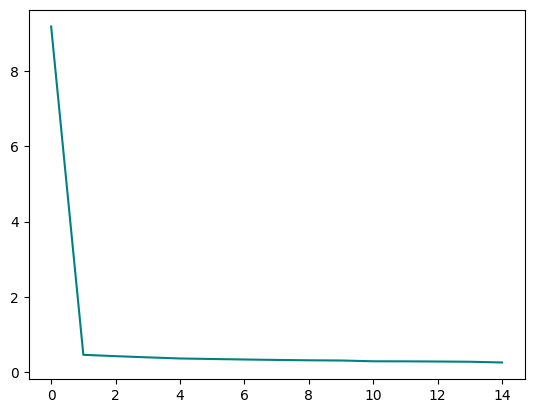

In [ ]:
# import matplotlib.pyplot as plt
# fig = plt.figure()
# plt.plot(hist.history['loss'], color='teal', label='loss')
# plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
# fig.suptitle('Loss', fontsize=20)
# plt.legend(loc="upper left")
# plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step - accuracy: 0.8851 - loss: 0.3106


In [ ]:
# Save model
model.save('/content/waste_classification_model.h5')  # Save in H5 format

# To download it, you can use the following
from google.colab import files
files.download('/content/waste_classification_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('my_model.keras')


In [ ]:
files.download('/content/my_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Upload the model file (e.g., 'my_model.keras') from your local machine to Colab
uploaded = files.upload()


Saving my_model.keras to my_model (1).keras


In [ ]:
from tensorflow.keras.models import load_model

# Specify the uploaded model's filename
model_path = 'my_model.keras'  # Name of the uploaded file

# Load the model
loaded_model = load_model(model_path)

# Check if the model was loaded successfully
loaded_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 124, 124, 16)        │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 58, 58, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 26912)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,722,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,473,092 (13.25 MB)

 Trainable params: 1,736,545 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,736,547 (6.62 MB)

In [16]:
from tensorflow.keras.preprocessing import image
from google.colab import files
carrot_img = files.upload()
img_path = list(carrot_img.keys())[0]
# carrot_img = carrot_img.resize((128, 128))

img = image.load_img(img_path, target_size=(128, 128))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
print(img_arr)
# carrot_img_arr = np.array(carrot_img)
# prediction = model.predict(img_arr)

Saving carrot.jpg to carrot.jpg
[[[[  2   4   1]
   [  2   4   1]
   [  2   4   1]
   ...
   [ 94 117 101]
   [ 79 119  59]
   [ 34  88   0]]

  [[  4   6   3]
   [  3   5   2]
   [  2   4   1]
   ...
   [101 144  91]
   [ 40  94   0]
   [ 77 136  42]]

  [[  8  10   7]
   [  0   1   0]
   [  2   4   1]
   ...
   [ 50 114   2]
   [ 24  76  14]
   [ 99 161  64]]

  ...

  [[141  36   4]
   [116  39  19]
   [ 62  36  19]
   ...
   [ 45  27  17]
   [ 72  54  44]
   [ 48  33  30]]

  [[123  32   1]
   [ 64  36  22]
   [ 52  35  19]
   ...
   [ 43  24  20]
   [ 44  25  21]
   [ 56  31  26]]

  [[ 80  38  16]
   [ 60  42  22]
   [ 51  34  24]
   ...
   [ 72  33  26]
   [ 64  25  18]
   [ 57  20  11]]]]


Prediction: [[0.01143838]]


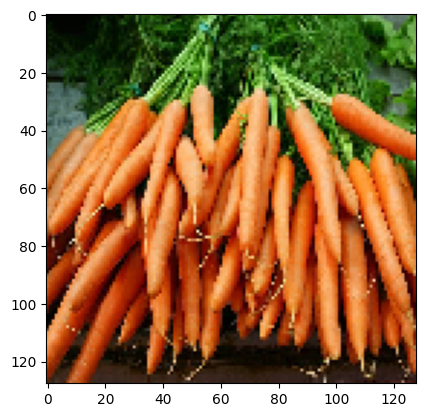

In [ ]:
print("Prediction:", prediction) # prediction got 0 when I input carrot
plt.imshow(img)
plt.show()

In [6]:
# print(keras.__version__)
print(tf.__version__)

2.17.1


In [11]:
!python --version


Python 3.10.12
